# Probleme de clasificare folosind ANN <img src="images/ann.jpeg" width="150">

## Obiective
* rezolvarea unei probleme de clasificare multi-clasa (metoda bazata pe $softmax$)
* folosirea unor algoritmi ne-liniari bazati pe retele neuronale (parametrii unei retele)
* normalizarea datelor (atributelor datelor)

## Cuvinte cheie:
* date de antrenare si date de testare 
* atribute/catacteristici ale datelor
* etichete ale datelor
* normalizare date 
* model de clasificare ne-liniar
* arhitectura (inputs, weights, ) si parametrii unei retele neuronale
* acuratetea, precizia si rapelul clasificarii

## Aspecte teoretice

Detalii despre ANN 
* parametrii 
    - layers - configuration of the multilayer perceptron layers (array of numbers where every number represents the number of neurons in specific layer).
    - max_iterations (no epochs) - this is the maximum number of iterations that gradient descent algorithm will use to find the minimum of a cost function. Low numbers may prevent gradient descent from reaching the minimum. High numbers will make the algorithm work longer without improving its accuracy.
    - Optional: regularization_param - parameter that will fight overfitting. The higher the parameter, the simplier is the model will be.
    
* structura (layere in, out, hiddent)
* cum arata layerul de input (in fc de problema ce trebuie rezolvata si feature-urile folosite; nrNeuroni = nrFeatures)
* cum arata layerul de output (pt o probl de clasificare cu k clase, softmax)


### Formalizare problema de clasificare multiclasa: <img src="images/softmax.jpg" width="200">

* **One vs. all** provides a way to leverage binary classification. Given a classification problem with $noClasses$ possible solutions, a one-vs.-all solution consists of $noClasses$ separate binary classifiers—one binary classifier for each possible outcome. During training, the model runs through a sequence of binary classifiers, training each to answer a separate classification question. For example, given five possible classes (apple, bear, candy, dog, egg) and a picture of a dog, five different recognizers might be trained, four seeing the image as a negative example (not a dog) and one seeing the image as a positive example (a dog). That is:
    - Is this image an apple? No.
    - Is this image a bear? No.
    - Is this image candy? No.
    - Is this image a dog? Yes.
    - Is this image an egg? No.


<img src="images/OneVsAll.svg" width="200">

This approach is fairly reasonable when the total number of classes is small, but becomes increasingly inefficient as the number of classes rises

* **Softmax** Recall that logistic regression produces a decimal between 0 and 1.0 $sigmoid(val) = \frac{1}{1 + e^{-val}}$. For example, a logistic regression output of 0.8 from an email classifier suggests an 80% chance of an email being spam and a 20% chance of it being not spam. Clearly, the sum of the probabilities of an email being either spam or not spam is 1.0. Softmax extends this idea into a multi-class world. That is, Softmax assigns decimal probabilities to each class in a multi-class problem. Those decimal probabilities must add up to 1.0. This additional constraint helps training converge more quickly than it otherwise would. For example, returning to the image analysis, Softmax might produce the following likelihoods of an image belonging to a particular class:

| Class	| Probability |
| :---: | :---------: |
| apple	| 0.001 |
| bear	| 0.04 |
| candy	| 0.008 |
| dog	| 0.95 |
| egg	| 0.001 |

Softmax is implemented through a neural network layer just before the output layer. The Softmax layer must have the same number of nodes as the output layer.

<img src="images/SoftmaxLayer.svg" width="200">

The Softmax equation is as follows:
$$softmax(val_i) = \frac{val_i}{\sum_{j=1}^{noClasses}{e^{val_j}}}$$


## Cerinte


###	Live – Ce fel de floare preferi?

Se consideră, din nou, problema clasificării florilor de iris în diferite specii precum: setosa, versicolor și virginica. Pentru fiecare floare se cunosc caracteristici precum: lungimea și lățimea sepalei, lungimea și lățimea petalei. Mai multe detalii despre acest set se pot găsi la [link](https://archive.ics.uci.edu/ml/datasets/Iris). Folosindu-se aceste informații, să se decidă din ce specie aparține o anumită floare. 

Să se rezolve problema, implementându-se rutine pentru clasificarea multi-clasă folosind rețele neuronale artificiale (cu tool).

Metodologie pentru a aplica o ANN (in fapt, un MLP) cu o anumita arhitectura pe setul de date iris (3 clase) - Etape:
    
* step1: load data (iris data and all features) 
* step2: impartire pe train si test \[Optional: plot pt distributia datelor pe clase - pt a verifica daca e echilibrat setul de train\]
* step3: normalizare 
* step4: invatare model (cu tool neural_network.MLPClassifier() -- [link](https://scikit-learn.org/stable/modules/neural_networks_supervised.html))
    - exemplificare cu model posibil ne-liniar (ANN)
* step5: testare model, plot rezultate, forma outputului si interpretarea lui
* step6: calcul metrici de performanta (acc)


In [1]:
from sklearn.preprocessing import StandardScaler

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

In [13]:
# step1: load the data

def loadIrisData():
    from sklearn.datasets import load_iris

    data = load_iris()
    inputs = data['data']
    outputs = data['target']
    outputNames = data['target_names']
    featureNames = list(data['feature_names'])
    feature1 = [feat[featureNames.index('sepal length (cm)')] for feat in inputs]
    feature2 = [feat[featureNames.index('petal length (cm)')] for feat in inputs]
    inputs = [[feat[featureNames.index('sepal length (cm)')], feat[featureNames.index('petal length (cm)')]] for feat in inputs]    
    return inputs, outputs, outputNames

inData, outData, featNames = loadIrisData()
print(featNames)
print(inData[0], inData[50], inData[-5])
print(outData[0], outData[50], outData[-5])


['setosa' 'versicolor' 'virginica']
[5.1, 1.4] [7.0, 4.7] [6.7, 5.2]
0 1 2


In [5]:
# step2: split data into train and test
import numpy as np 

def splitData(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]
    
    return trainInputs, trainOutputs, testInputs, testOutputs

In [9]:

from sklearn import neural_network

classifier = neural_network.MLPClassifier()

def training(classifier, trainInputs, trainOutputs):
    # step4: training the classifier
    # identify (by training) the classification model
    classifier.fit(trainInputs, trainOutputs)

def classification(classifier, testInputs):
    # step5: testing (predict the labels for new inputs)
    # makes predictions for test data 
    computedTestOutputs = classifier.predict(testInputs)

    return computedTestOutputs


In [6]:
import matplotlib.pyplot as plt 


def plotConfusionMatrix(cm, classNames, title):
    from sklearn.metrics import confusion_matrix
    import itertools 

    classes = classNames
    plt.figure()
    # plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                horizontalalignment = 'center',
                color = 'white' if cm[row, column] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

def evalMultiClass(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix

    confMatrix = confusion_matrix(realLabels, computedLabels)
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall, confMatrix

In [7]:
def data2FeaturesMoreClasses(inputs, outputs):
    labels = set(outputs)
    noData = len(inputs)
    for crtLabel in labels:
        x = [inputs[i][0] for i in range(noData) if outputs[i] == crtLabel ]
        y = [inputs[i][1] for i in range(noData) if outputs[i] == crtLabel ]
        plt.scatter(x, y, label = outputNames[crtLabel])
    plt.xlabel('feat1')
    plt.ylabel('feat2')
    plt.legend()
    plt.show() 

## train a classifier using simple multilayer perceptron for iris flower classification.

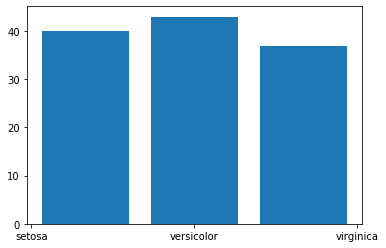

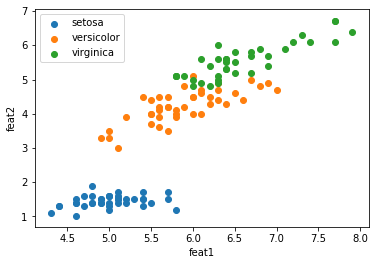

Iteration 1, loss = 0.89050498
Iteration 2, loss = 0.79020695
Iteration 3, loss = 0.70261682
Iteration 4, loss = 0.63795055
Iteration 5, loss = 0.59294737
Iteration 6, loss = 0.55980303
Iteration 7, loss = 0.53299519
Iteration 8, loss = 0.50913765
Iteration 9, loss = 0.48668042
Iteration 10, loss = 0.46438364
Iteration 11, loss = 0.44226943
Iteration 12, loss = 0.42161313
Iteration 13, loss = 0.40252943
Iteration 14, loss = 0.38534053
Iteration 15, loss = 0.37002397
Iteration 16, loss = 0.35631526
Iteration 17, loss = 0.34377371
Iteration 18, loss = 0.33211015
Iteration 19, loss = 0.32117627
Iteration 20, loss = 0.31100910
Iteration 21, loss = 0.30165144
Iteration 22, loss = 0.29309232
Iteration 23, loss = 0.28528781
Iteration 24, loss = 0.27814662
Iteration 25, loss = 0.27156702
Iteration 26, loss = 0.26545860
Iteration 27, loss = 0.25974428
Iteration 28, loss = 0.25437110
Iteration 29, loss = 0.24930393
Iteration 30, loss = 0.24408987
Iteration 31, loss = 0.23811077
Iteration 32, los

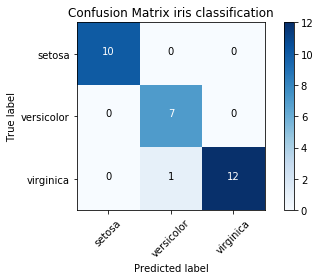

acc:  0.9666666666666667
precision:  {'setosa': 1.0, 'versicolor': 0.875, 'virginica': 1.0}
recall:  {'setosa': 1.0, 'versicolor': 1.0, 'virginica': 0.9230769230769231}


In [10]:
# main flow
from sklearn import neural_network
from sklearn import linear_model

inputs, outputs, outputNames = loadIrisData()
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)

# plot the training data distribution on classes
plt.hist(trainOutputs, 3, rwidth = 0.8)
plt.xticks(np.arange(len(outputNames)), outputNames)
plt.show()

# plot the data in order to observe the shape of the classifier required in this problem
data2FeaturesMoreClasses(trainInputs, trainOutputs)

# normalise the data
trainInputs, testInputs = normalisation(trainInputs, testInputs)

# liniar classifier and one-vs-all approach for multi-class
# classifier = linear_model.LogisticRegression()

# non-liniar classifier and softmax approach for multi-class 
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)


training(classifier, trainInputs, trainOutputs)
predictedLabels = classification(classifier, testInputs)
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)
plotConfusionMatrix(cm, outputNames, "iris classification")

print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)




### Live: Ce cifră am scris?

Se consideră un set de imagini care conțin cifre scrise de mână. Sa se decida ce cifra apare intr-o imagine.

Să se rezolve problema folosind rețele neuronale artificiale (cu tool). Incercati folosirea unei ANN cu aceeasi arhitectura ca la problema cu florile de iris si analizati ce se intampla.

Metodologie:

Incercam sa aplicam acelasi MLP pt NIST/MNIST set (o parte din date); Observam ca:
* se parcurg aceeasi pasi ca la clasificarea florilor de iris (mai putin pasul de normalizare, imaginile fiind definite in acelasi domeniu de culori/gri-uri)
* dar ar tb sa modifice putin arhitectura ca sa invete un model mai performant
* challenge: sa se gaseasca cea mai buna arhitectura



In [13]:
import numpy as np

def loadDigitData():
    from sklearn.datasets import load_digits

    data = load_digits()
    inputs = data.images
    outputs = data['target']
    outputNames = data['target_names']
     
    # shuffle the original data
    noData = len(inputs)
    permutation = np.random.permutation(noData)
    inputs = inputs[permutation]
    outputs = outputs[permutation]

    return inputs, outputs, outputNames


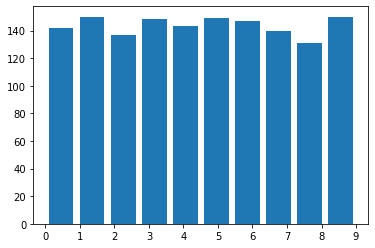

Iteration 1, loss = 2.27810622
Iteration 2, loss = 1.54692777
Iteration 3, loss = 1.05670217
Iteration 4, loss = 0.77847832
Iteration 5, loss = 0.60717452
Iteration 6, loss = 0.47901016
Iteration 7, loss = 0.40583374
Iteration 8, loss = 0.36827667
Iteration 9, loss = 0.32538813
Iteration 10, loss = 0.30243395
Iteration 11, loss = 0.27884433
Iteration 12, loss = 0.25800418
Iteration 13, loss = 0.24334742
Iteration 14, loss = 0.22764030
Iteration 15, loss = 0.21440147
Iteration 16, loss = 0.20150454
Iteration 17, loss = 0.19222273
Iteration 18, loss = 0.18401795
Iteration 19, loss = 0.17212980
Iteration 20, loss = 0.16978750
Iteration 21, loss = 0.16947651
Iteration 22, loss = 0.15838433
Iteration 23, loss = 0.15174972
Iteration 24, loss = 0.14801898
Iteration 25, loss = 0.14762747
Iteration 26, loss = 0.14132400
Iteration 27, loss = 0.13818281
Iteration 28, loss = 0.12827350
Iteration 29, loss = 0.12406738
Iteration 30, loss = 0.12202021
Iteration 31, loss = 0.11743061
Iteration 32, los

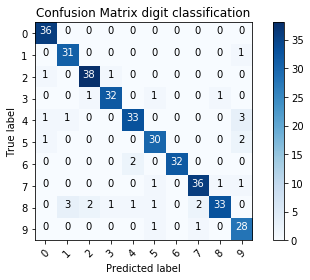

acc:  0.9138888888888889
precision:  {0: 0.9230769230769231, 1: 0.8857142857142857, 2: 0.926829268292683, 3: 0.9411764705882353, 4: 0.9166666666666666, 5: 0.8823529411764706, 6: 1.0, 7: 0.9230769230769231, 8: 0.9428571428571428, 9: 0.8}
recall:  {0: 1.0, 1: 0.96875, 2: 0.95, 3: 0.9142857142857143, 4: 0.868421052631579, 5: 0.9090909090909091, 6: 0.9411764705882353, 7: 0.9230769230769231, 8: 0.7674418604651163, 9: 0.9333333333333333}


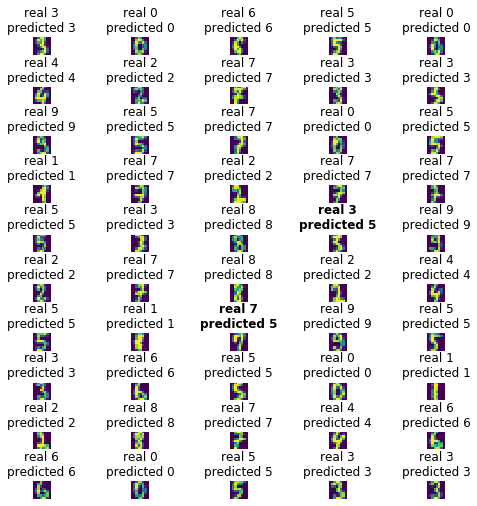

In [12]:
# main flow
inputs, outputs, outputNames = loadDigitData()
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
# check if the data is uniform distributed over classes
plt.hist(trainOutputs, rwidth = 0.8)
plt.xticks(np.arange(len(outputNames)), outputNames)
plt.show()


def flatten(mat):
    x = []
    for line in mat:
        for el in line:
            x.append(el)
    return x 

trainInputsFlatten = [flatten(el) for el in trainInputs]
testInputsFlatten = [flatten(el) for el in testInputs]
trainInputsNormalised, testInputsNormalised = normalisation(trainInputsFlatten, testInputsFlatten)

# try to play by MLP parameters (e.g. change the HL size from 10 to 20 and see how this modification impacts the accuracy)
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5, ), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

training(classifier, trainInputsNormalised, trainOutputs)
predictedLabels = classification(classifier, testInputsNormalised)
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)


plotConfusionMatrix(cm, outputNames, "digit classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

# plot first 50 test images and their real and computed labels
n = 10
m = 5
fig, axes = plt.subplots(n, m, figsize = (7, 7))
fig.tight_layout() 
for i in range(0, n):
    for j in range(0, m):
        axes[i][j].imshow(testInputs[m * i + j])
        if (testOutputs[m * i + j] == predictedLabels[m * i + j]):
            font = 'normal'
        else:
            font = 'bold'
        axes[i][j].set_title('real ' + str(testOutputs[m * i + j]) + '\npredicted ' + str(predictedLabels[m * i + j]), fontweight=font)
        axes[i][j].set_axis_off()
        
plt.show()


## Problema tema: clasificare poze

Tocmai ti-ai inceput prima ta zi de munca ca si software developer la Facebook. Faci parte din echipa care se ocupa cu partea de continut a platformei. 

Echipa de analisti a observat ca foarte multe persoane folosesc filtre peste pozele lor, asadar in speranta de a promova continut mai putin editat, si poze cat mai reale, doresc sa implementeze o noua functionalite in care sa arate utilizatorilor daca o poza a fost sau nu editata. Pentru a testa aceasta idee, si pentru a vedea daca utlizatorilor li s-ar parea folositoare o astfel de functionalitate, au decis sa testeze ideea pe pozele care au filtre sepia. 

Primul task al tau este sa implementezi un algoritm de clasificare a pozelor care sa ne spuna daca o poza are sau nu adaugat filtru sepia. Rezolvarea task-ului implica folosirea unei ANN.

Team leaderul echipei de ML iti propune urmatorul plan de lucru:

1. devoltarea, antrenarea si testarea unei retele neuronale folosind data de tip numeric (de ex datele cu irisi) si date de tip imagine (de ex baza de date cu cifre) 

2. crearea unei baze cu imagini (cu si fara filtru sepia) si etichetele corespunzatoare 

3.	antrenarea unui clasificator (bazat pe retele neuronale artificiale – tool sau ANN-ul dezvoltat la pasul 1) pentru clasificarea imaginilor cu si fara filtru

4.	testarea clasificatorului


## Tema optionala

-	implementare algoritm de Programare genetica sau alt algoritm de invatare automata supervizata (SVM, Decision Tree, Naive Bayes, etc) pentru același task de diferențiere între poze cu și fără filtru.
-	Dezvoltarea unei noi functionalitati de login in reteaua sociala pe baza de recunoastere faciala. Pentru aceasta se doreste implementarea unui sistem de recunoaștere a fețelor astfel:
    1. Extragerea unor caractersitici din imaginile cu fete (Se poate folosi o librarie specializata precum Dlib )
    2. Clasificarea imaginilor pe baza acestor caracteristici 

